# CMSC 320 Final Project: Suicide Analysis
### Eric Choy

## Analysis of Suicides Over the Years

Suicide is the act of people inflicting violence towards themselves with the intent to kill, and they die because of their actions. A suicide attempt is when people harm themselves determined to kill themselves, but they don't die because of their actions. Everyone is at risk of suicide. Many factors could contribute to a person thinking about suicide. It can be issues with the family or school, mental disorders, or substance abuse. Even though most people will go through the risk factors of suicide, many do not attempt it. Many people think differently and react to stimuli differently.

In this tutorial, we will be looking at any changes in suicide numbers and rates over the years.

First, we need data to help with this analysis. The data that will be used in this analysis is from the datasets tab of this website: https://www.kaggle.com/
An account has to be made, but if you are planning to practice with other datasets, this is a good website to get data from.
The data can be downloaded as .csv file, therefore the file will have comma separated values.

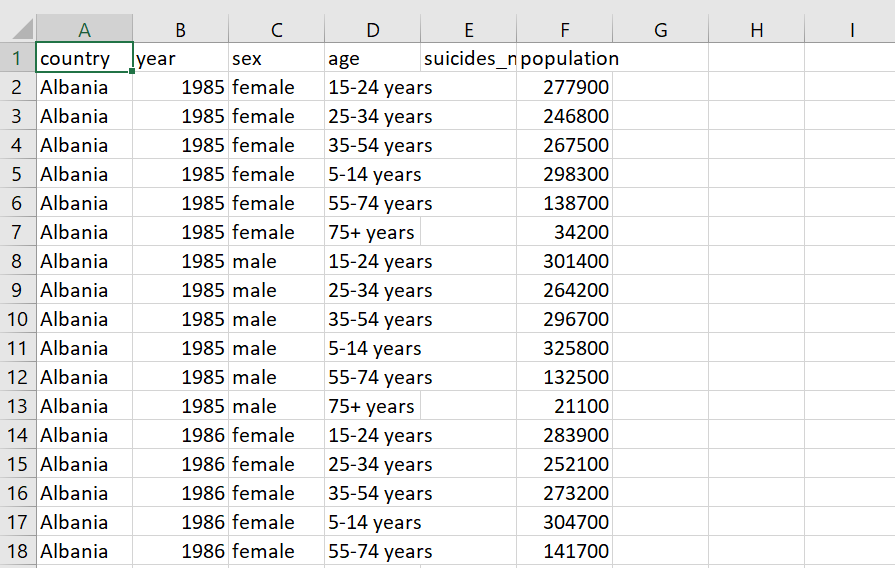
Screenshot of some the data of the downloaded csv file

In [1]:
import pandas as pd # allows the use of the pandas library - dataframes
import numpy as np # allows the use of the numpy library - arrays, scientific computing

suicides = pd.read_csv("who_suicide_statistics.csv", sep=',') # putting the data from the spreadsheet into a dataframe

# filtering the years of the data from 1985 to 2014 because the data for 2015 had barely any data, so the values had a dramatic change
suicides = suicides[suicides.year < 2015]
suicides = suicides[suicides.year > 1984]

# convert the country column values to strings
suicides['country'] = suicides['country'].apply(str)

suicides.head() # printing out the first 5 values of the dataframe

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


The dataframe above shows NaN values for the number of suicides, but there are also NaN value for population. This can occur when the data is not being recorded or if the data hasn't been recorded. I decided to work with countries that don't have a NaN value for the number of suicides or the population.

In [2]:
import math # allows the use of the math library - mathmatical functions
countries = []  # countries that don't have a NaN value
countries1 = [] # countries that do have a NaN value

# iterating through each row of the dataframe
for index, row in suicides.iterrows():
    if math.isnan(row['suicides_no']):   # checking for NaN value
        countries1.append(row['country']) # adding the country to the unused countries
    if math.isnan(row['population']):
        countries1.append(row['country'])
    if row['country'] not in countries1 and row['country'] not in countries: # checking if the country is in unused countries list
        countries.append(row['country']) # adding the country to the used countries

suicides.loc[suicides.country.isin(countries), "Label"] = "1" # Adding a label to filter out the unused countries from the dataframe

# made a new dataframe with the updated countries
new = suicides.loc[(suicides['Label'] == "1")]
new.head()

,country,year,sex,age,suicides_no,population,Label
732,Antigua and Barbuda,1985,female,15-24 years,0.0,7709.0,1
733,Antigua and Barbuda,1985,female,25-34 years,0.0,6344.0,1
734,Antigua and Barbuda,1985,female,35-54 years,0.0,6173.0,1
735,Antigua and Barbuda,1985,female,5-14 years,0.0,7339.0,1
736,Antigua and Barbuda,1985,female,55-74 years,0.0,3778.0,1


The dataframe above is the newly updated dataframe where all countries with NaN values were removed

This graph shows the number of suicides across the years

In [3]:
# Both allow the use of picturing graphs
import matplotlib.pyplot as plt
import seaborn as sns

#scatter plot of all the rows of the data
f, total = plt.subplots(figsize=(10, 10))
total = sns.scatterplot(x="year", y="suicides_no", data=new)
plt.ylabel('Number of Suicides')
plt.xlabel('Year')
plt.title('Suicides Over Time')
plt.show()

<Figure size 1000x1000 with 1 Axes>

This next graph shows the number of suicides across the years grouped by sex

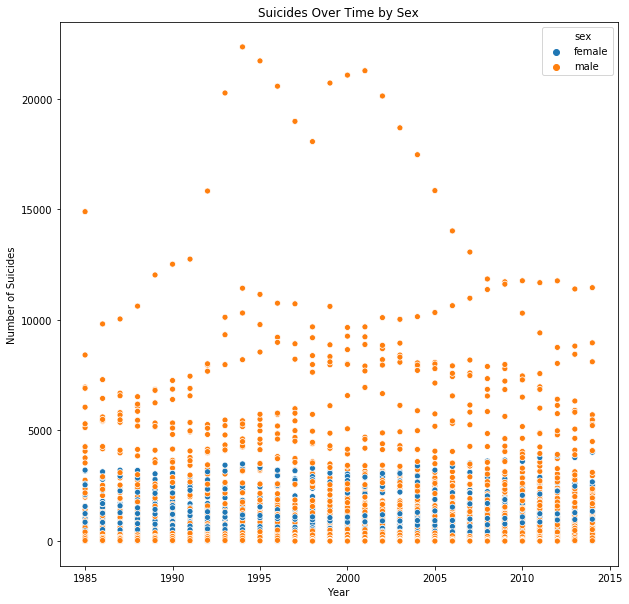

In [4]:
f, sexes = plt.subplots(figsize=(10, 10))
sexes = sns.scatterplot(x="year", y="suicides_no", hue = "sex", data=new)
plt.ylabel('Number of Suicides')
plt.xlabel('Year')
plt.title('Suicides Over Time by Sex')
plt.show()

This next graph shows the number of suicides across the years grouped by ages

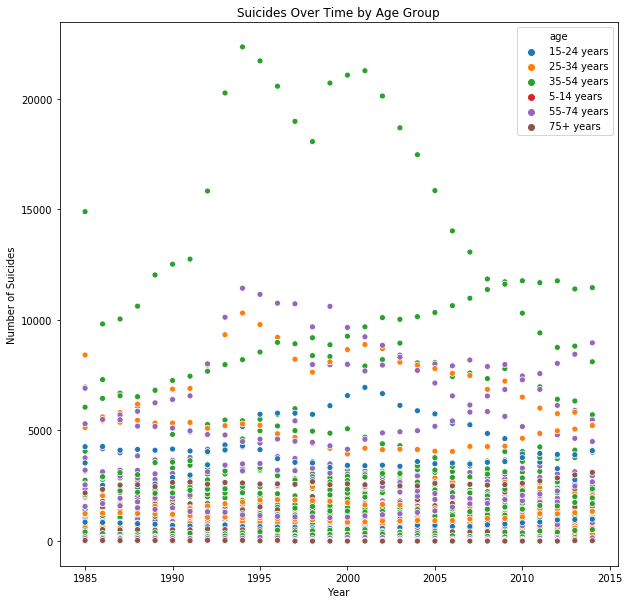

In [5]:
f, age = plt.subplots(figsize=(10, 10))
age = sns.scatterplot(x="year", y="suicides_no", hue = "age", data=new)
plt.ylabel('Number of Suicides')
plt.xlabel('Year')
plt.title('Suicides Over Time by Age Group')
plt.show()

We will now look at the United States of America and its suicides over the years.

We must make a new dataframe where the rows must correspond with the data of the US in the original dataframe.

In [6]:
US = new.loc[(new['country'] == "United States of America")] # create new dataframe with rows that have United States of America
US.head()

,country,year,sex,age,suicides_no,population,Label
41988,United States of America,1985,female,15-24 years,854.0,19589000.0,1
41989,United States of America,1985,female,25-34 years,1242.0,21041000.0,1
41990,United States of America,1985,female,35-54 years,2105.0,27763000.0,1
41991,United States of America,1985,female,5-14 years,73.0,16553000.0,1
41992,United States of America,1985,female,55-74 years,1568.0,21366000.0,1


In [7]:
#Finding the total of males and each of the 6 age groups presented in the US
ma = US.loc[(US['sex'] == "male")]
m1 = US.loc[(US['age'] == "5-14 years") & (US['sex'] == "male")]
m2 = US.loc[(US['age'] == "15-24 years") & (US['sex'] == "male")]
m3 = US.loc[(US['age'] == "25-34 years") & (US['sex'] == "male")]
m4 = US.loc[(US['age'] == "35-54 years") & (US['sex'] == "male")]
m5 = US.loc[(US['age'] == "55-74 years") & (US['sex'] == "male")]
m6 = US.loc[(US['age'] == "75+ years") & (US['sex'] == "male")]

#Finding the total of females and each of the 6 age groups presented in the US
fe = US.loc[(US['sex'] == "female")]
f1 = US.loc[(US['age'] == "5-14 years") & (US['sex'] == "female")]
f2 = US.loc[(US['age'] == "15-24 years") & (US['sex'] == "female")]
f3 = US.loc[(US['age'] == "25-34 years") & (US['sex'] == "female")]
f4 = US.loc[(US['age'] == "35-54 years") & (US['sex'] == "female")]
f5 = US.loc[(US['age'] == "55-74 years") & (US['sex'] == "female")]
f6 = US.loc[(US['age'] == "75+ years") & (US['sex'] == "female")]

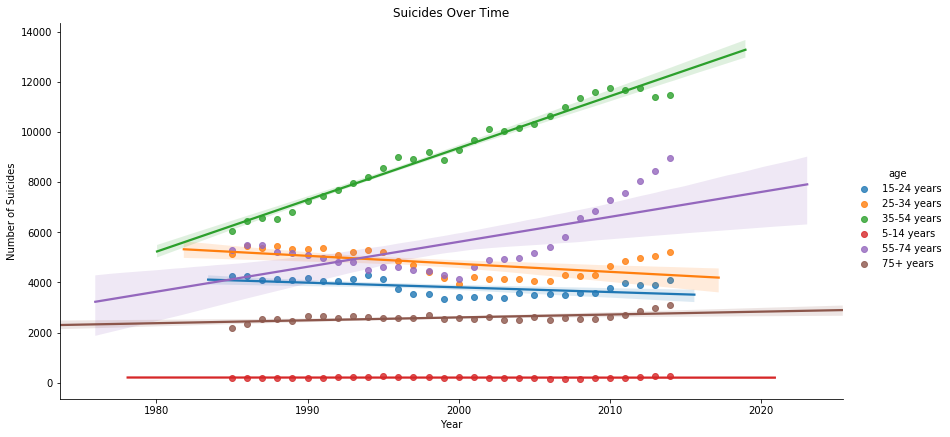

In [8]:
males = sns.lmplot(x="year", y="suicides_no", hue = "age", data=ma,height=6, aspect=2, fit_reg = True)
plt.ylabel('Number of Suicides')
plt.xlabel('Year')
plt.title('Suicides Over Time')
plt.show()


This graph above shows the suicides over the years of male age groups. Some of these trends are very noticeable, but some are not. 

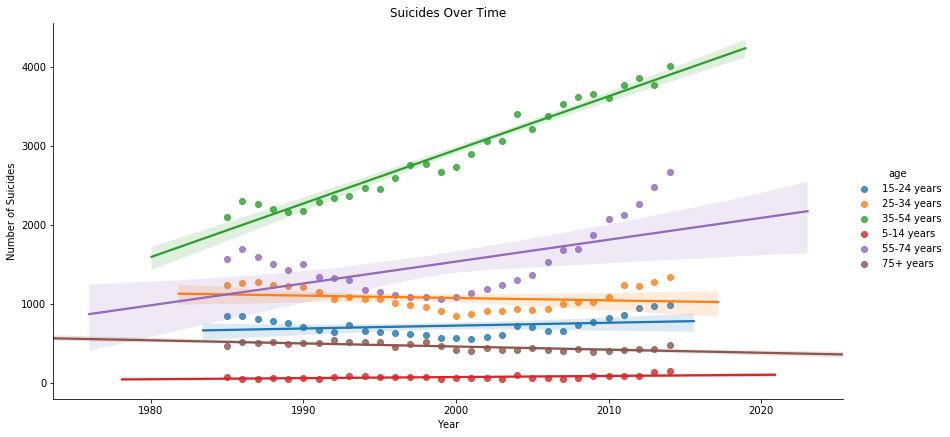

In [9]:
females = sns.lmplot(x="year", y="suicides_no", hue = "age", data=fe,height=6, aspect=2, fit_reg = True)
plt.ylabel('Number of Suicides')
plt.xlabel('Year')
plt.title('Suicides Over Time')
plt.show()

This graph above shows the suicides over the years of female age groups. Similar to the previous graph, these trends act in the same way.

In order to truly see if there is a linear relationship with each age group in the data, we will standardize the data in case of any outliers. It will reduce variablility in the data. In order to standardize variables, we will need to calculate the mean and standard deviation of each age group. We can use this formula:
## $$X_{new} = \frac{x - \mu}{\sigma}$$
to find the standardized data value.

In [10]:
#calculating the mean and std of males and each age group
mean1 = m1['suicides_no'].mean()
mstd1 = m1['suicides_no'].std()

mean2 = m2['suicides_no'].mean()
mstd2 = m2['suicides_no'].std()

mean3 = m3['suicides_no'].mean()
mstd3 = m3['suicides_no'].std()

mean4 = m4['suicides_no'].mean()
mstd4 = m4['suicides_no'].std()

mean5 = m5['suicides_no'].mean()
mstd5 = m5['suicides_no'].std()

mean6 = m6['suicides_no'].mean()
mstd6 = m6['suicides_no'].std()

In [11]:
#calculating the mean and std of females and each age group
fmean1 = f1['suicides_no'].mean()
fstd1 = f1['suicides_no'].std()

fmean2 = f2['suicides_no'].mean()
fstd2 = f2['suicides_no'].std()

fmean3 = f3['suicides_no'].mean()
fstd3 = f3['suicides_no'].std()

fmean4 = f4['suicides_no'].mean()
fstd4 = f4['suicides_no'].std()

fmean5 = f5['suicides_no'].mean()
fstd5 = f5['suicides_no'].std()

fmean6 = f6['suicides_no'].mean()
fstd6 = f6['suicides_no'].std()

In [12]:
import warnings #it showed warnings, but the data was right - just to hide them
warnings.filterwarnings('ignore')

# making a new column called standardize for the male dataframe of each age group
m1['standardize'] = (m1['suicides_no'] - mean1)/(mstd1)
m2['standardize'] = (m2['suicides_no'] - mean2)/(mstd2)
m3['standardize'] = (m3['suicides_no'] - mean3)/(mstd3)
m4['standardize'] = (m4['suicides_no'] - mean4)/(mstd4)
m5['standardize'] = (m5['suicides_no'] - mean5)/(mstd5)
m6['standardize'] = (m6['suicides_no'] - mean6)/(mstd6)

In [13]:
# making a new column called standardize for the female dataframe of each age group
f1['standardize'] = (f1['suicides_no'] - fmean1)/(fstd1)
f2['standardize'] = (f2['suicides_no'] - fmean2)/(fstd2)
f3['standardize'] = (f3['suicides_no'] - fmean3)/(fstd3)
f4['standardize'] = (f4['suicides_no'] - fmean4)/(fstd4)
f5['standardize'] = (f5['suicides_no'] - fmean5)/(fstd5)
f6['standardize'] = (f6['suicides_no'] - fmean6)/(fstd6)

In [14]:
#combining all the separate dataframes into one
resultm = pd.concat([m1,m2,m3,m4,m5,m6])
resultm.head()

,country,year,sex,age,suicides_no,population,Label,standardize
41997,United States of America,1985,male,5-14 years,205.0,17370000.0,1,-0.072446
42009,United States of America,1986,male,5-14 years,199.0,17338000.0,1,-0.256111
42021,United States of America,1987,male,5-14 years,199.0,17486000.0,1,-0.256111
42033,United States of America,1988,male,5-14 years,181.0,17751000.0,1,-0.807107
42045,United States of America,1989,male,5-14 years,184.0,18010000.0,1,-0.715274


In [15]:
#combining all the separate dataframes into one
resultf = pd.concat([f1,f2,f3,f4,f5,f6])
resultf.head()

,country,year,sex,age,suicides_no,population,Label,standardize
41991,United States of America,1985,female,5-14 years,73.0,16553000.0,1,-0.141963
42003,United States of America,1986,female,5-14 years,56.0,16517000.0,1,-0.873286
42015,United States of America,1987,female,5-14 years,52.0,16660000.0,1,-1.045362
42027,United States of America,1988,female,5-14 years,62.0,16904000.0,1,-0.615172
42039,United States of America,1989,female,5-14 years,56.0,17151000.0,1,-0.873286


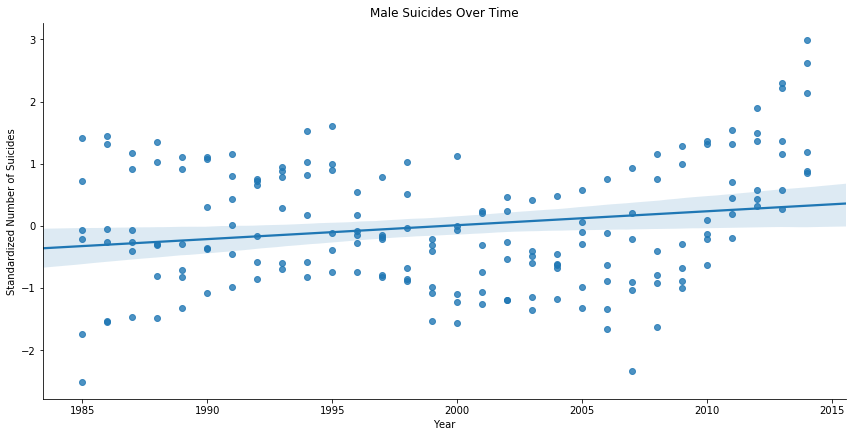

In [16]:
males = sns.lmplot(x="year", y="standardize", data=resultm,height=6, aspect=2, fit_reg = True)
plt.ylabel('Standardized Number of Suicides')
plt.xlabel('Year')
plt.title('Male Suicides Over Time')
plt.show()

The graph shows the standardized number of suicides vs. the year of all the males in the United States.

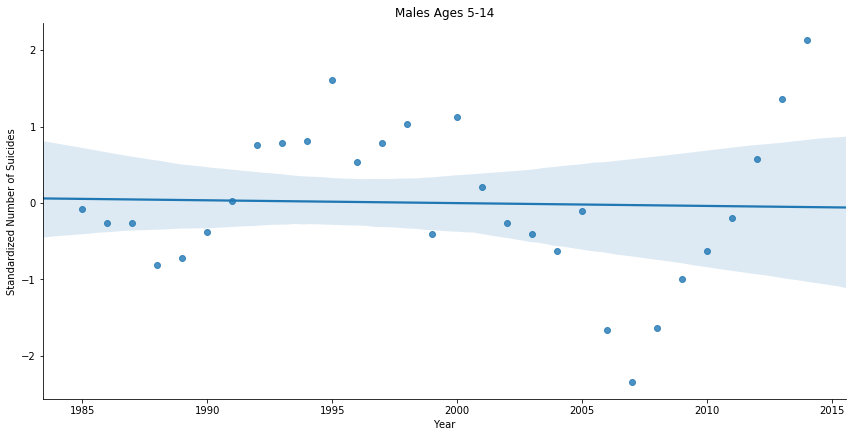

In [17]:
males1 = sns.lmplot(x="year", y="standardize", data=m1,height=6, aspect=2, fit_reg = True)
plt.ylabel('Standardized Number of Suicides')
plt.xlabel('Year')
plt.title('Males Ages 5-14')
plt.show()

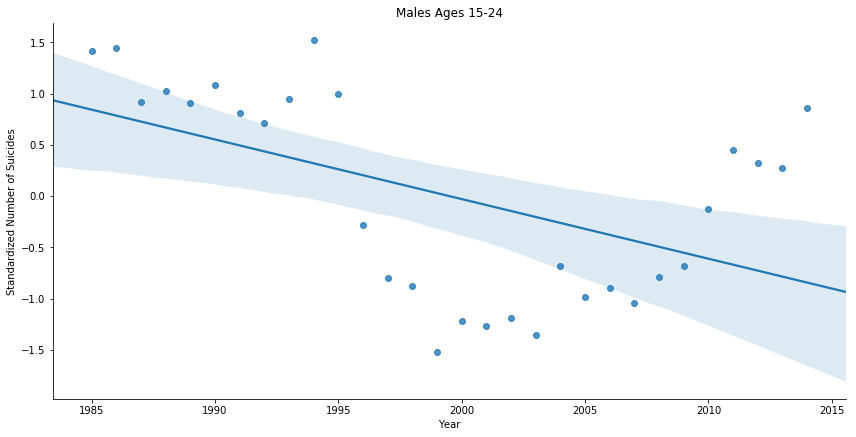

In [18]:
males2 = sns.lmplot(x="year", y="standardize", data=m2,height=6, aspect=2, fit_reg = True)
plt.ylabel('Standardized Number of Suicides')
plt.xlabel('Year')
plt.title('Males Ages 15-24')
plt.show()

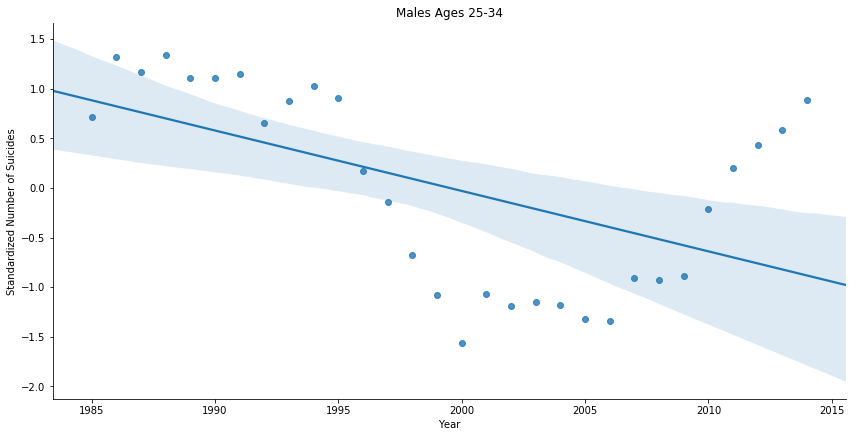

In [19]:
males3 = sns.lmplot(x="year", y="standardize", data=m3,height=6, aspect=2, fit_reg = True)
plt.ylabel('Standardized Number of Suicides')
plt.xlabel('Year')
plt.title('Males Ages 25-34')
plt.show()

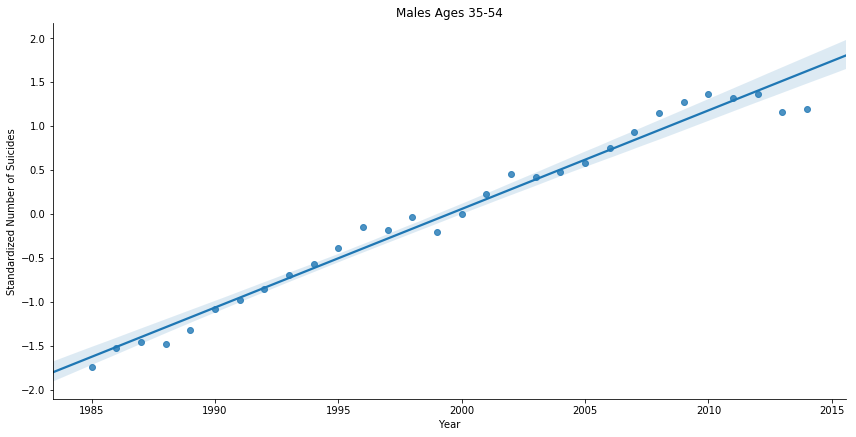

In [20]:
males4 = sns.lmplot(x="year", y="standardize", data=m4,height=6, aspect=2, fit_reg = True)
plt.ylabel('Standardized Number of Suicides')
plt.xlabel('Year')
plt.title('Males Ages 35-54')
plt.show()

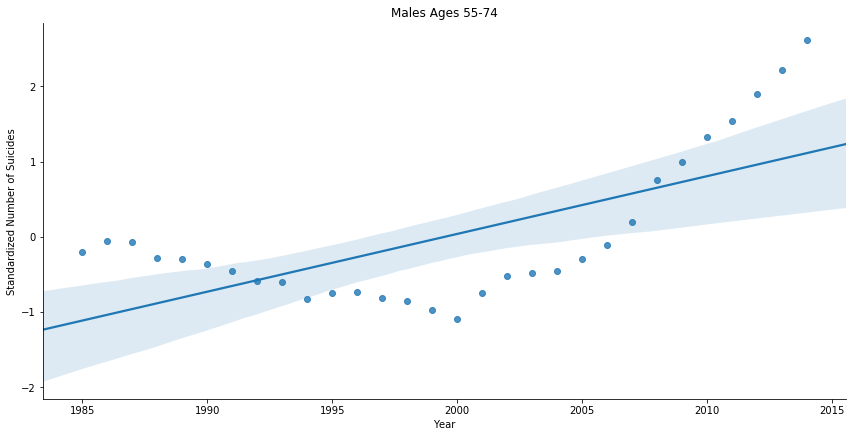

In [21]:
males5 = sns.lmplot(x="year", y="standardize", data=m5,height=6, aspect=2, fit_reg = True)
plt.ylabel('Standardized Number of Suicides')
plt.xlabel('Year')
plt.title('Males Ages 55-74')
plt.show()

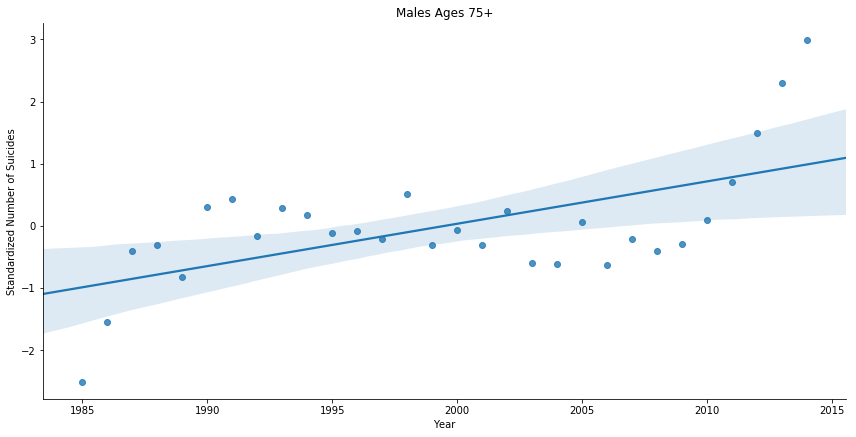

In [22]:
males6 = sns.lmplot(x="year", y="standardize", data=m6,height=6, aspect=2, fit_reg = True)
plt.ylabel('Standardized Number of Suicides')
plt.xlabel('Year')
plt.title('Males Ages 75+')
plt.show()

Out of all 6 graphs, the only graph that shows a linear relationship is Males Ages 35-54. Its residuals are very close to the linear regression line unlike the data points in the other graphs. If this is right, it seems that suicides of this age group is increasing over the years dramatically

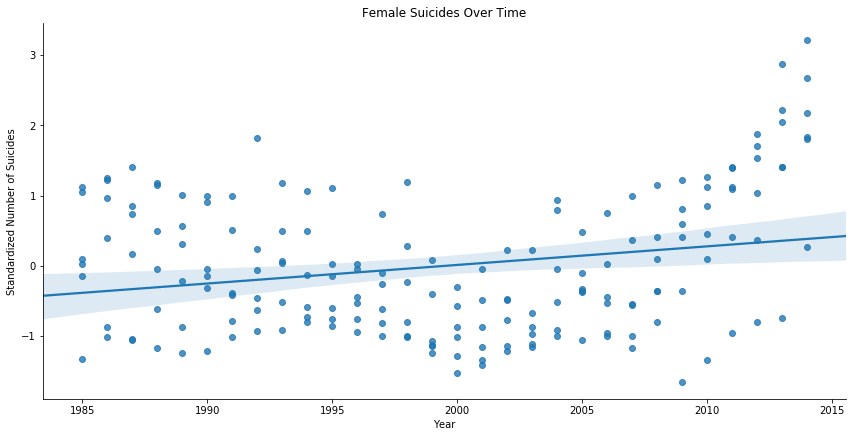

In [23]:
females = sns.lmplot(x="year", y="standardize", data=resultf,height=6, aspect=2, fit_reg = True)
plt.ylabel('Standardized Number of Suicides')
plt.xlabel('Year')
plt.title('Female Suicides Over Time')
plt.show()

The graph above shows the standardized number of suicides vs. the year of all the females in the United States.

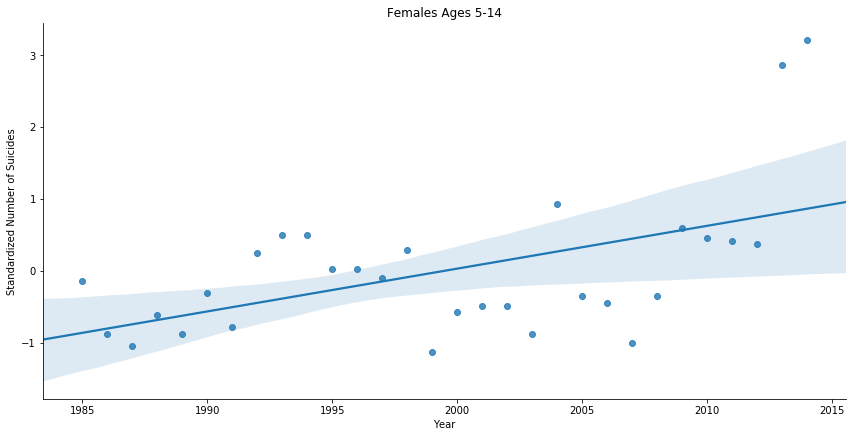

In [24]:
females1 = sns.lmplot(x="year", y="standardize", data=f1,height=6, aspect=2, fit_reg = True)
plt.ylabel('Standardized Number of Suicides')
plt.xlabel('Year')
plt.title('Females Ages 5-14')
plt.show()

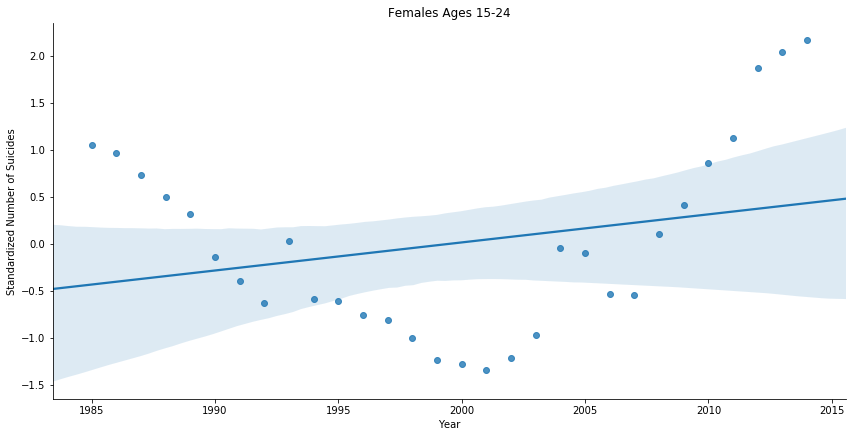

In [25]:
females2 = sns.lmplot(x="year", y="standardize", data=f2,height=6, aspect=2, fit_reg = True)
plt.ylabel('Standardized Number of Suicides')
plt.xlabel('Year')
plt.title('Females Ages 15-24')
plt.show()

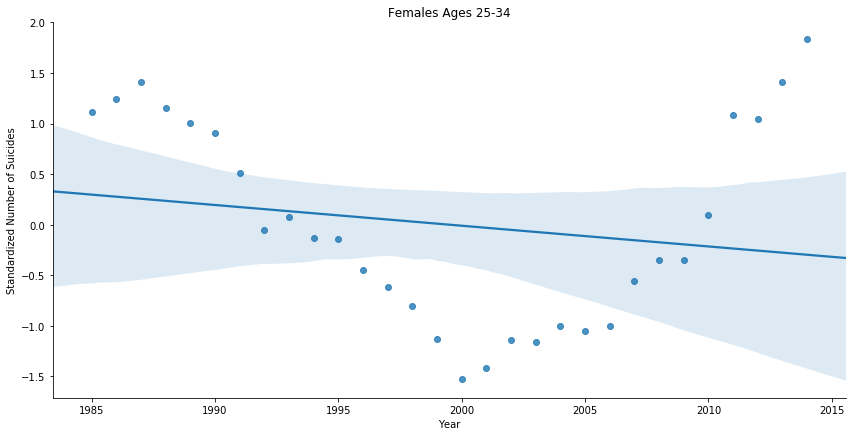

In [26]:
females3 = sns.lmplot(x="year", y="standardize", data=f3,height=6, aspect=2, fit_reg = True)
plt.ylabel('Standardized Number of Suicides')
plt.xlabel('Year')
plt.title('Females Ages 25-34')
plt.show()

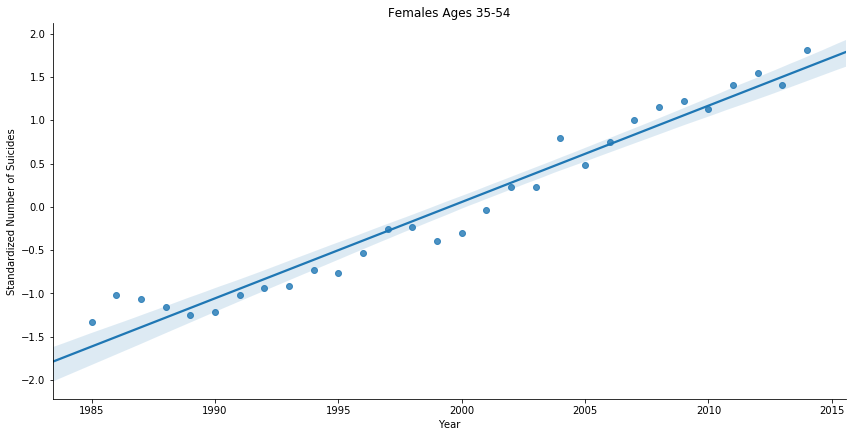

In [27]:
females4 = sns.lmplot(x="year", y="standardize", data=f4,height=6, aspect=2, fit_reg = True)
plt.ylabel('Standardized Number of Suicides')
plt.xlabel('Year')
plt.title('Females Ages 35-54')
plt.show()

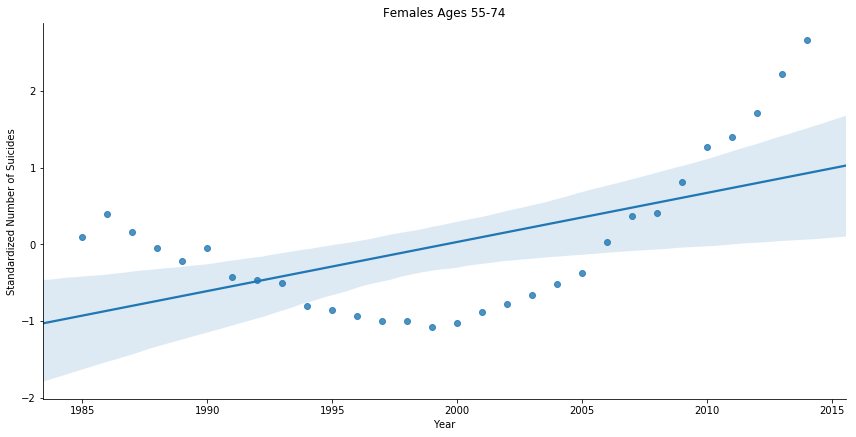

In [28]:
females5 = sns.lmplot(x="year", y="standardize", data=f5,height=6, aspect=2, fit_reg = True)
plt.ylabel('Standardized Number of Suicides')
plt.xlabel('Year')
plt.title('Females Ages 55-74')
plt.show()

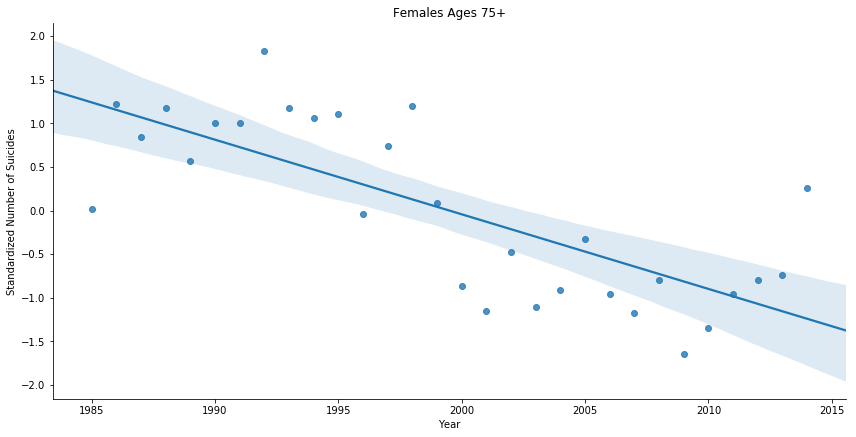

In [29]:
females6 = sns.lmplot(x="year", y="standardize", data=f6,height=6, aspect=2, fit_reg = True)
plt.ylabel('Standardized Number of Suicides')
plt.xlabel('Year')
plt.title('Females Ages 75+')
plt.show()

Unlike the graphs for the males, 2 of these graphs show a linear relationship over time. Just like for the males, Age group 35-54 for the females has a strong relationship, since the residuals are very close to the regression line. Although Age group 75+ years for the females doesn't have as strong a relationship as Age group 34-54 years, the graph does show a linear relationship of declining suicide rates for this age group.

## Conclusion
At the beginning of this tutorial, we wanted to see the trends of suicide rates across the years. Based on these results, I believe that Men and Women ages 34-55 have a higher chance of suicide than any other age group. The data suggests that suicide rates will increase for this age group. 
Women are more like to attempt suicide, but men are more likely to die by suicide because men will use more violent tactics. Most people won't kill themselves if they have risk factors for suicide, but it is important to notice any warnings people may show. It may include talking abouting dying, withdrawing from friends and family, taking dangerous risks, and many more. To learn more about these warning signs, you can go to this website: https://www.nimh.nih.gov/index.shtml to learn more about suicide warning , preventions, and causes and effects.

If You Know Someone in Crisis: Call the toll-free National Suicide Prevention Lifeline (NSPL) at 1–800–273–TALK (8255), 24 hours a day, 7 days a week. The service is available to everyone. 
The deaf and hard of hearing can contact the Lifeline via TTY at 1–800–799–4889. All calls are confidential. 
Contact social media outlets directly if you are concerned about a friend’s social media updates or dial 911 in an emergency. Learn more on the NSPL’s website. The Crisis Text Line is another resource available 24 hours a day, 7 days a week. Text “HOME” to 741741.

Link for NSPL: https://suicidepreventionlifeline.org/
Link for social media outlets: https://suicidepreventionlifeline.org/help-someone-else/#section-2